In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# matplotlib 한글화

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [6]:
import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
! pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=81afd6e72474f3d4676db5a3e56a49d758e2771c9fe884f8f45eda3ecc68c398
  Stored in directory: c:\users\bitcamp\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


In [4]:
import mglearn

### Knn(최근접이웃) 알고리즘

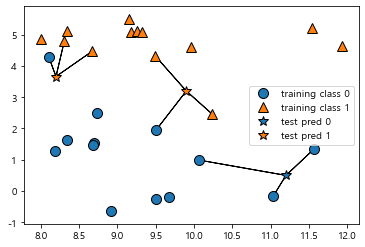

In [8]:
# 학습용 데이터 시각화
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [44]:
x,y = mglearn.datasets.make_forge()

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
knn.score(x_train,y_train)

0.9

In [27]:
knn.score(x_test,y_test)

1.0

### 과적합(overfitting)
- 알고리즘이 train data에 과도하게 학습이 되어, train data는 잘 맞추지만 test data를 잘 못맞추는 현상
- 모델이 train data를 잘 맞추도록 지나치게 복잡하게 만들어진 경우


#### 과적합을 해소
- 데이터를 많이 확보
- 모델의 단순화

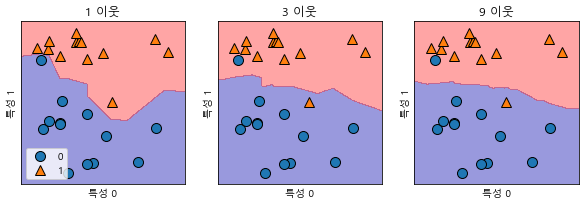

In [39]:
# axes : 그래프 (1,3)개
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors).fit(x,y)
    mglearn.plots.plot_2d_separator(knn, x, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(x[:,0],x[:,1], y, ax=ax)
    ax.set_title('{} 이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

In [48]:
# multiclass classification

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [49]:
x = cancer.data
y = cancer.target

In [51]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=cancer.target, random_state=66)

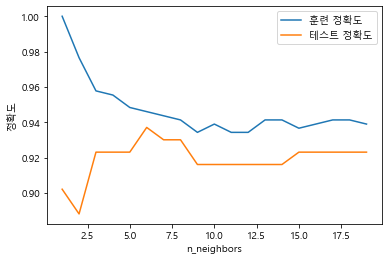

In [52]:
training_accuracy = []
test_accuracy = []

for k in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
    
    training_accuracy.append(clf.score(x_train,y_train))
    
    test_accuracy.append(clf.score(x_test,y_test))


plt.plot(list(range(1,20)), training_accuracy, label= '훈련 정확도')
plt.plot(list(range(1,20)), test_accuracy, label= '테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

In [ ]:
# 전체적으로 train data accuracy > test data accuracy

# 과적합 (k=1) : 모델이 복잡함
# train data accuracy > test data accuracy

# 과소적합 (k>=10) : 모델이 학습이 부족해서 예측능력이 낮은 경우
# train data와 test data의 정확도가 둘 다 낮다

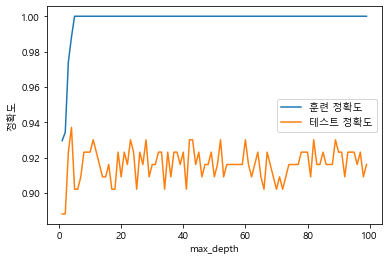

In [70]:
from sklearn.tree import DecisionTreeClassifier

training_accuracy = []
test_accuracy = []

for k in range(1,100,1):
    clf = DecisionTreeClassifier(max_depth=k).fit(x_train,y_train)
    
    training_accuracy.append(clf.score(x_train,y_train))
    
    test_accuracy.append(clf.score(x_test,y_test))


plt.plot(list(range(1,100,1)), training_accuracy, label= '훈련 정확도')
plt.plot(list(range(1,100,1)), test_accuracy, label= '테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('max_depth')
# legend : 범례
plt.legend()

In [71]:
df = pd.read_csv('./ml_source_files/loan_data.csv')

In [73]:
y = df['not.fully.paid']
x = df.drop('not.fully.paid',axis=1)
x = pd.get_dummies(x)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=66)

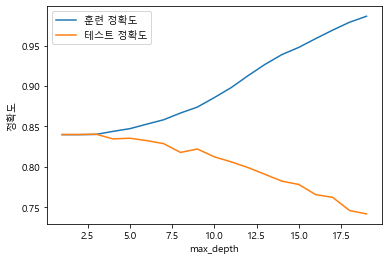

In [81]:
from sklearn.tree import DecisionTreeClassifier

training_accuracy = []
test_accuracy = []

for k in range(1,20,1):
    clf = DecisionTreeClassifier(max_depth=k).fit(x_train,y_train)
    
    training_accuracy.append(clf.score(x_train,y_train))
    
    test_accuracy.append(clf.score(x_test,y_test))


plt.plot(list(range(1,20,1)), training_accuracy, label= '훈련 정확도')
plt.plot(list(range(1,20,1)), test_accuracy, label= '테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('max_depth')
# legend : 범례
plt.legend()

### 회귀분석의 과적합

In [83]:
house_df = pd.read_csv('./ml_source_files/house_price.csv')

In [84]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [92]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [91]:
house_df.isna().sum().sort_values()

Id                  0
SaleCondition       0
HeatingQC           0
CentralAir          0
1stFlrSF            0
                 ... 
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
Fence            1179
Length: 76, dtype: int64

In [87]:
house_df.drop(['PoolQC','MiscFeature','Alley','FireplaceQu','LotFrontage'], axis= 1, inplace = True)

In [89]:
house_df.fillna(house_df.mean(), inplace = True)

In [94]:
house_df.isna().sum().sort_values(ascending=False)

Fence           1179
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
                ... 
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
MSSubClass         0
SalePrice          0
Length: 76, dtype: int64

In [93]:
house_df_one = pd.get_dummies(house_df)

In [95]:
house_df_one.isna().sum().sort_values(ascending=False)

Id                       0
BsmtQual_Ex              0
BsmtCond_Po              0
BsmtCond_Gd              0
BsmtCond_Fa              0
                        ..
Condition2_Feedr         0
Condition2_Norm          0
Condition2_PosA          0
Condition2_PosN          0
SaleCondition_Partial    0
Length: 275, dtype: int64

In [96]:
house_df_one.shape

(1460, 275)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [100]:
y = house_df_one['SalePrice']
x = house_df_one.drop(['SalePrice','Id'], axis = 1)

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [120]:
lr = LinearRegression()

In [134]:
lr.fit(x_train, y_train)

LinearRegression()

In [135]:
train_preds = lr.predict(x_train)
test_preds = lr.predict(x_test)

In [136]:
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

In [137]:
print(train_mse, test_mse, train_mse/test_mse)
# train에서 오차가 매우 작음 => 과적합 => 모델을 단순화

353815348.07582337 1140700364.5264118 0.31017378364976506


In [125]:
# coef : 회귀계수
print(len(lr.coef_))   # 계수가 273개인 매우 복합한 회귀모델

273


In [127]:
lr.coef_

array([-3.00625977e+01,  8.15588982e-01,  6.34945081e+03,  6.68434512e+03,
        4.37237762e+02,  8.93020228e+01,  2.00658947e+01,  1.53302182e+01,
        1.19105559e+01, -4.02169685e+00,  2.32190235e+01,  2.94262278e+01,
        4.79632666e+01, -4.98408451e+01,  2.75487781e+01,  2.33850370e+02,
       -2.54657094e+03,  5.16452926e+03, -4.20228635e+01, -5.43028029e+03,
       -1.25668973e+04,  1.00896852e+03,  1.43250939e+03, -1.51530770e+01,
        7.02801168e+03, -2.34986757e+00,  8.27639838e+00,  1.68550004e+01,
        9.98471752e+00,  2.80111272e+01,  4.15467048e+01,  9.12195282e+01,
       -3.12197159e-01, -4.84239387e+02, -7.82562606e+02, -1.87748109e+04,
        9.92060142e+03,  2.61168596e+03,  7.64915791e+03, -1.40663440e+03,
       -1.20602573e+04,  1.20602573e+04, -2.84642443e+03, -1.16613954e+03,
        5.73425736e+03, -1.72169339e+03,  3.09123525e+03,  6.31749475e+03,
       -1.13489287e+04,  1.94019866e+03,  1.44924554e+04, -1.44924554e+04,
        3.92173884e+03,  

### 회귀모델의 과적합 해소 => 회귀모델을 단순화

1. 변수의 수를 줄인다 => lasso
2. 계수의 값을 작게 만든다 => ridge

In [128]:
from sklearn.linear_model import Ridge, Lasso

In [144]:
# alpha가 커질수록 계수가 0에 가까워진다
rid = Ridge(alpha = 10)
rid.fit(x_train, y_train)
rid_train_preds = rid.predict(x_train)
rid_test_preds = rid.predict(x_test)

rid_train_mse = mean_squared_error(y_train,rid_train_preds)
rid_test_mse = mean_squared_error(y_test,rid_test_preds)
print(rid_train_mse, rid_test_mse, rid_train_mse/rid_test_mse)

586511550.6444207 1056938282.5070871 0.5549156089352719


In [149]:
las = Lasso(alpha = 1000)
las.fit(x_train, y_train)
las_train_preds = las.predict(x_train)
las_test_preds = las.predict(x_test)

las_train_mse = mean_squared_error(y_train,las_train_preds)
las_test_mse = mean_squared_error(y_test,las_test_preds)
print(las_train_mse, las_test_mse, las_train_mse/las_test_mse)

950380663.5081232 1307941725.2420113 0.7266230942607723


In [151]:
from sklearn.metrics import r2_score

In [161]:
train_acc = []
test_acc = []
mse_ratio = []

for i in np.arange(0.001, 1, 0.001):
    rid = Ridge(alpha = i)
    rid.fit(x_train, y_train)
    rid_train_preds = rid.predict(x_train)
    rid_test_preds = rid.predict(x_test)

    rid_train_mse = mean_squared_error(y_train,rid_train_preds)
    rid_test_mse = mean_squared_error(y_test,rid_test_preds)

    train_acc.append(r2_score(y_train, rid_train_preds))
    test_acc.append(r2_score(y_test, rid_test_preds))
    mse_ratio.append(rid_train_mse/rid_test_mse)

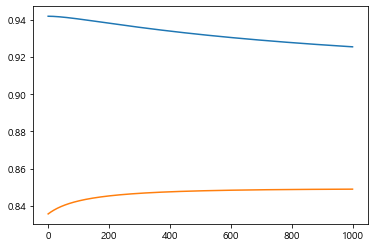

In [162]:
plt.plot(train_acc)
plt.plot(test_acc)